In [71]:
#Understand the problem of my data:Studying the relative_velocity speed of objects (that could pose a danger to the Earth) and the extent of their danger ✔
#Understand my data features ✔
#diameter(max/min):The diameter_max is the distance between the two farthest points on the solid, while the diameter_min is half the maximum diameter.
#relative_velocity:It is the relative speed at which the body moves
#miss_distance:It is the distance between the tracking point in the object's scope and its actual point
#orbiting_body:The target body here (Earth)
#absolute_magnitude:Apparent body size
#hazardous:The ability to create danger from the body to the Earth


**Insights from the data:**

1. diameter(max/min) have a not normal distrubution ,Because their values are close to each other
2. there some of outliers
3. The number of objects that pose a danger to the ground is smaller than those that pose a danger
4. There is an inverse relationship between the length of the diameter and the relative speed of the body
5. There is a direct relationship between relative_velocity and absolute_magnitude

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Exploration**

In [3]:
import pandas as pd
file_path = '/content/NASA.csv'
df = pd.read_csv('/content/NASA.csv' , encoding='ISO-8859-1')
df

,id,name,diameter_min,diameter_max,relative_velocity,miss_distance,orbiting_body,sentry,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249220,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726660,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692100,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303140,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733760,46275567.00,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886690,12300389.18,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605070,54321206.42,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,28400768.16,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154480,68692060.53,Earth,False,27.80,False


In [4]:
df.describe

<bound method NDFrame.describe of              id                 name  diameter_min  diameter_max  \
0       2162635  162635 (2000 SS164)      1.198271      2.679415   
1       2277475    277475 (2005 WK4)      0.265800      0.594347   
2       2512244   512244 (2015 YE18)      0.722030      1.614507   
3       3596030          (2012 BV13)      0.096506      0.215794   
4       3667127          (2014 GE35)      0.255009      0.570217   
...         ...                  ...           ...           ...   
90831   3763337           (2016 VX1)      0.026580      0.059435   
90832   3837603           (2019 AD3)      0.016771      0.037501   
90833  54017201           (2020 JP3)      0.031956      0.071456   
90834  54115824           (2021 CN5)      0.007321      0.016370   
90835  54205447           (2021 TW7)      0.039862      0.089133   

       relative_velocity  miss_distance orbiting_body  sentry  \
0           13569.249220    54839744.08         Earth   False   
1           73588.7

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   diameter_min        90836 non-null  float64
 3   diameter_max        90825 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90828 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry              90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
df.head()

,id,name,diameter_min,diameter_max,relative_velocity,miss_distance,orbiting_body,sentry,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True


**cleaning**

In [7]:
df.duplicated().sum()

17

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape , df.size

((90819, 10), 908190)

In [11]:
len(df['hazardous'])

90819

In [13]:
df.columns

Index(['id', 'name', 'diameter_min', 'diameter_max', 'relative_velocity',
       'miss_distance', 'orbiting_body', 'sentry', 'absolute_magnitude',
       'hazardous'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90819 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90819 non-null  int64  
 1   name                90819 non-null  object 
 2   diameter_min        90819 non-null  float64
 3   diameter_max        90808 non-null  float64
 4   relative_velocity   90819 non-null  float64
 5   miss_distance       90811 non-null  float64
 6   orbiting_body       90819 non-null  object 
 7   sentry              90819 non-null  bool   
 8   absolute_magnitude  90819 non-null  float64
 9   hazardous           90819 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 6.4+ MB


**check uniques values > objects > string**

In [15]:
#Object name ,orbiting_body
df['name'].unique()

array(['162635 (2000 SS164)', '277475 (2005 WK4)', '512244 (2015 YE18)',
       ..., '(2021 WR3)', '(2015 VK142)', '(1999 LV7)'], dtype=object)

In [16]:
df['name'].value_counts()

469219 Kamo`oalewa (2016 HO3)    43
277810 (2006 FV35)               43
(2016 CA138)                     40
138175 (2000 EE104)              39
(2019 XS)                        38
                                 ..
(2017 CS)                         1
(2017 KJ3)                        1
(2017 OA20)                       1
(2017 KK27)                       1
(1999 LV7)                        1
Name: name, Length: 27422, dtype: int64

In [17]:
df['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [18]:
df['orbiting_body'].value_counts()

Earth    90819
Name: orbiting_body, dtype: int64

In [19]:
df_missing = pd.read_csv("/content/NASA.csv")
df_missing

,id,name,diameter_min,diameter_max,relative_velocity,miss_distance,orbiting_body,sentry,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249220,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726660,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692100,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303140,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733760,46275567.00,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886690,12300389.18,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605070,54321206.42,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,28400768.16,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154480,68692060.53,Earth,False,27.80,False


In [20]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   diameter_min        90836 non-null  float64
 3   diameter_max        90825 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90828 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry              90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [21]:
# missing values -> diameter_max , miss_distance
df_missing['diameter_max'].isnull().sum() , df_missing['miss_distance'].isnull().sum()

(11, 8)

In [22]:
df_missing['diameter_max'].head()

0    2.679415
1    0.594347
2    1.614507
3    0.215794
4    0.570217
Name: diameter_max, dtype: float64

In [23]:
df_missing['miss_distance'].head()

0    54839744.08
1    61438126.52
2    49798724.94
3    25434972.72
4    46275567.00
Name: miss_distance, dtype: float64

In [24]:
mean_miss_distance = df_missing['miss_distance'].mean()
df_missing['miss_distance'].fillna(mean_miss_distance, inplace=True)

In [25]:
df_missing['miss_distance'].isnull().sum()

0

In [26]:
mean_diameter_max = df_missing['diameter_max'].mean()
df_missing['diameter_max'].fillna(mean_diameter_max, inplace=True)

In [27]:
df_missing['diameter_max'].isnull().sum()

0

In [28]:
df_missing.head()

,id,name,diameter_min,diameter_max,relative_velocity,miss_distance,orbiting_body,sentry,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.24922,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.72666,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.69210,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.30314,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.73376,46275567.00,Earth,False,20.09,True


In [29]:
df_missing.isnull().sum()

id                    0
name                  0
diameter_min          0
diameter_max          0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry                0
absolute_magnitude    0
hazardous             0
dtype: int64

In [30]:
df

,id,name,diameter_min,diameter_max,relative_velocity,miss_distance,orbiting_body,sentry,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249220,54839744.08,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726660,61438126.52,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692100,49798724.94,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303140,25434972.72,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733760,46275567.00,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886690,12300389.18,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605070,54321206.42,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,28400768.16,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154480,68692060.53,Earth,False,27.80,False


**visualization**

In [31]:
categorical_columns = df.select_dtypes(include=['object' ,'bool']).columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

In [32]:
#numerical
#plots

In [33]:
import matplotlib.pyplot as plt

In [34]:
numerical_columns

Index(['id', 'diameter_min', 'diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

In [35]:
#Histogram

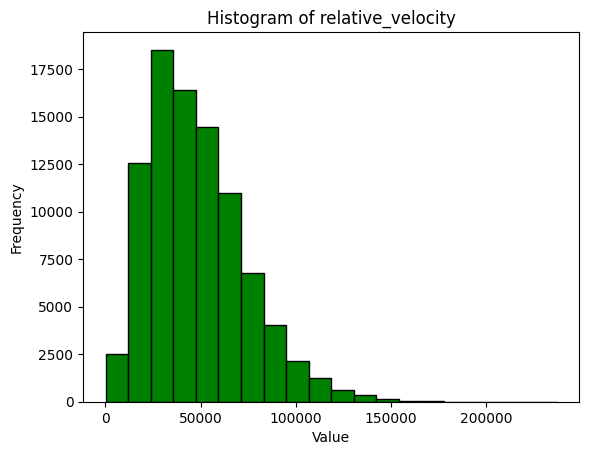

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/NASA.csv')
plt.hist(df['relative_velocity'], bins=20, color='green', edgecolor='black' , alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of relative_velocity')
plt.show()

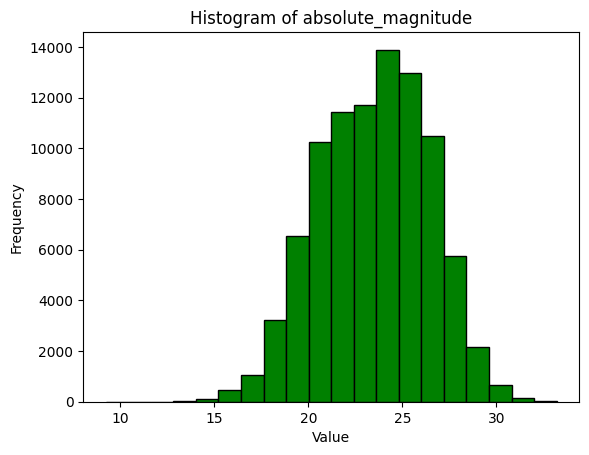

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/NASA.csv')
plt.hist(df['absolute_magnitude'], bins=20, color='green', edgecolor='black' , alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of absolute_magnitude')
plt.show()

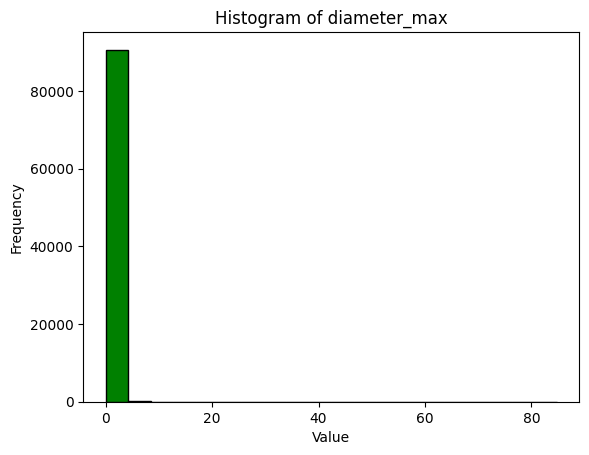

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/NASA.csv')
plt.hist(df['diameter_max'], bins=20, color='green', edgecolor='black' , alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of diameter_max')
plt.show()

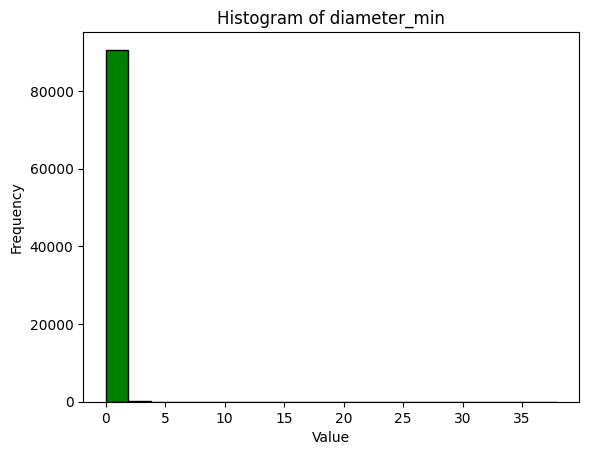

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/NASA.csv')
plt.hist(df['diameter_min'], bins=20, color='green', edgecolor='black' , alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of diameter_min')
plt.show()

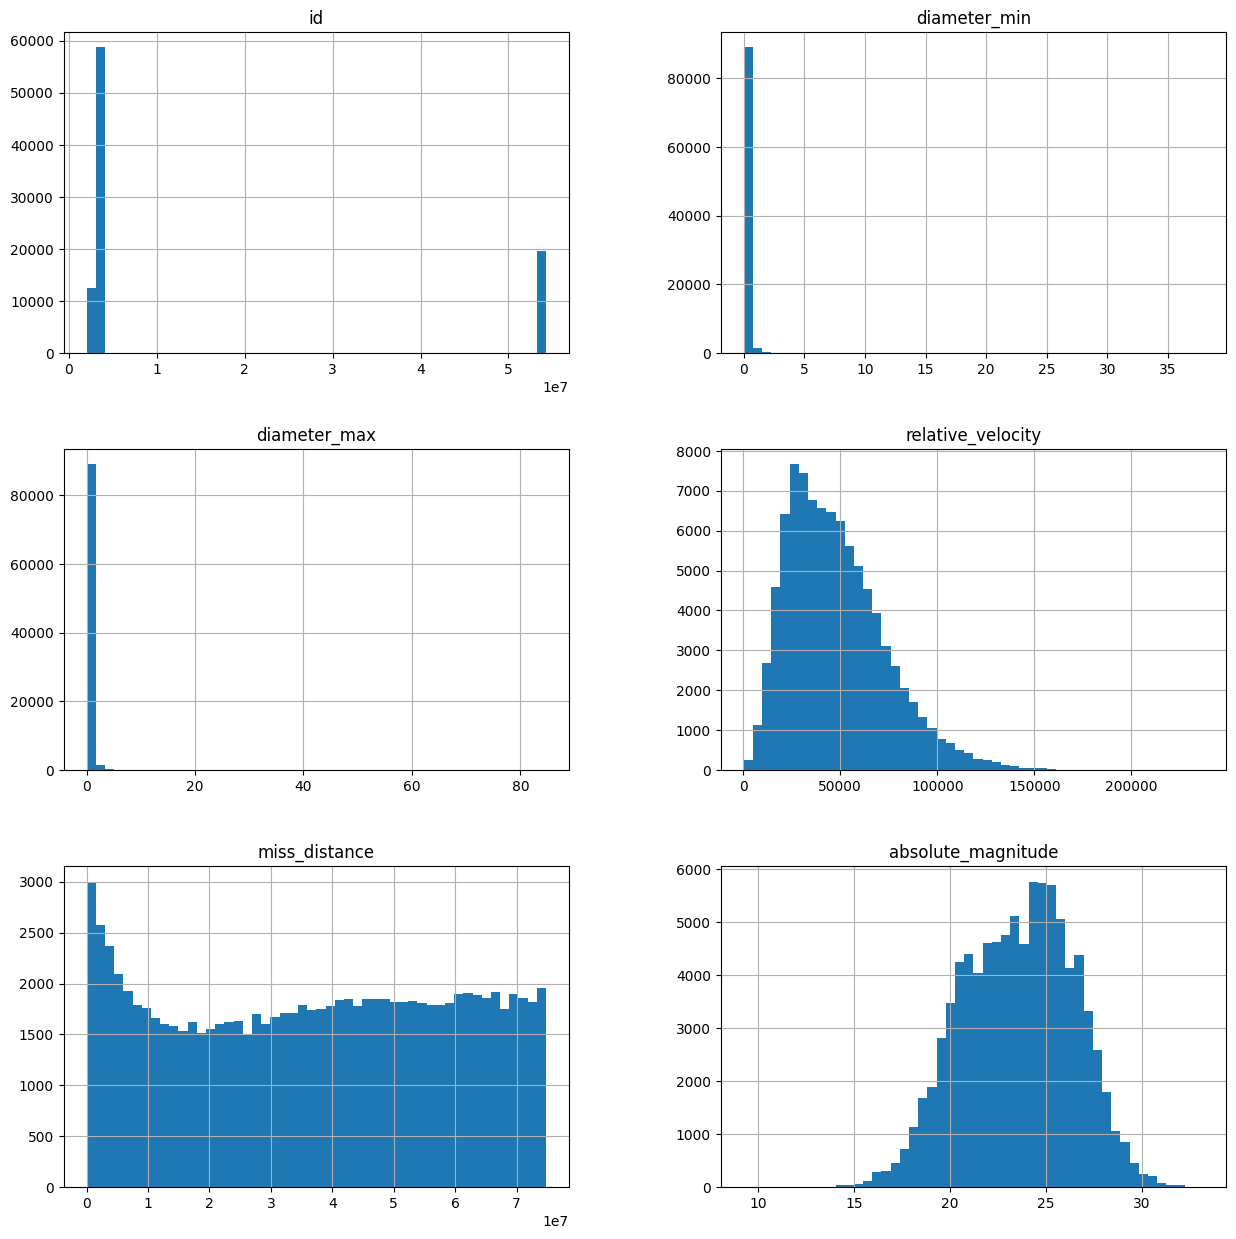

In [40]:
df.hist(figsize=(15,15), bins=50)
plt.show()

In [41]:
#Outliers:

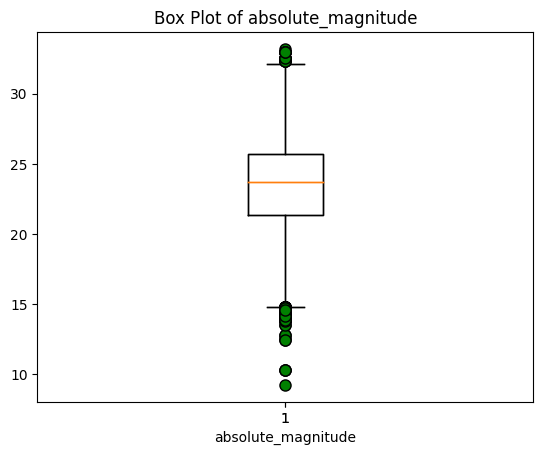

In [42]:
import matplotlib.pyplot as plt
plt.boxplot(df['absolute_magnitude'])
plt.boxplot(df['absolute_magnitude'], flierprops={'marker': 'o', 'markerfacecolor': 'green', 'markersize': 8})
plt.xlabel('absolute_magnitude')
plt.title('Box Plot of absolute_magnitude')
plt.show()

In [43]:
df['absolute_magnitude'].describe()

count    90836.000000
mean        23.526736
std          2.893972
min          9.230000
25%         21.340000
50%         23.700000
75%         25.700000
max         33.200000
Name: absolute_magnitude, dtype: float64

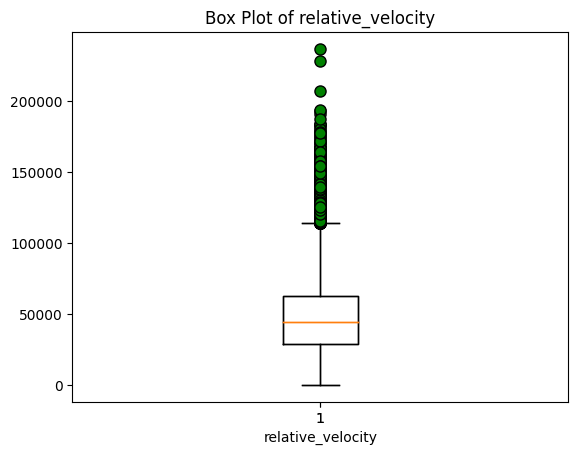

In [44]:
import matplotlib.pyplot as plt
plt.boxplot(df['relative_velocity'])
plt.boxplot(df['relative_velocity'], flierprops={'marker': 'o', 'markerfacecolor': 'green', 'markersize': 8})
plt.xlabel('relative_velocity')
plt.title('Box Plot of relative_velocity')
plt.show()

In [45]:
df['relative_velocity'].describe()

count     90836.000000
mean      48067.570742
std       25294.597611
min         203.346432
25%       28617.260002
50%       44189.391040
75%       62928.556130
max      236990.128100
Name: relative_velocity, dtype: float64

In [46]:
df.corr()

<ipython-input-46-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,diameter_min,diameter_max,relative_velocity,miss_distance,sentry,absolute_magnitude,hazardous
id,1.000000,-0.148330,-0.148334,-0.059208,-0.056478,NaN,0.277292,-0.123477
diameter_min,-0.148330,1.000000,1.000000,0.221530,0.142240,NaN,-0.560192,0.183352
diameter_max,-0.148334,1.000000,1.000000,0.221559,0.142268,NaN,-0.560188,0.183363
relative_velocity,-0.059208,0.221530,0.221559,1.000000,0.327237,NaN,-0.353842,0.191242
miss_distance,-0.056478,0.142240,0.142268,0.327237,1.000000,NaN,-0.264140,0.042302
sentry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,0.277292,-0.560192,-0.560188,-0.353842,-0.264140,NaN,1.000000,-0.365282
hazardous,-0.123477,0.183352,0.183363,0.191242,0.042302,NaN,-0.365282,1.000000


<ipython-input-47-aa107a31e6fb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


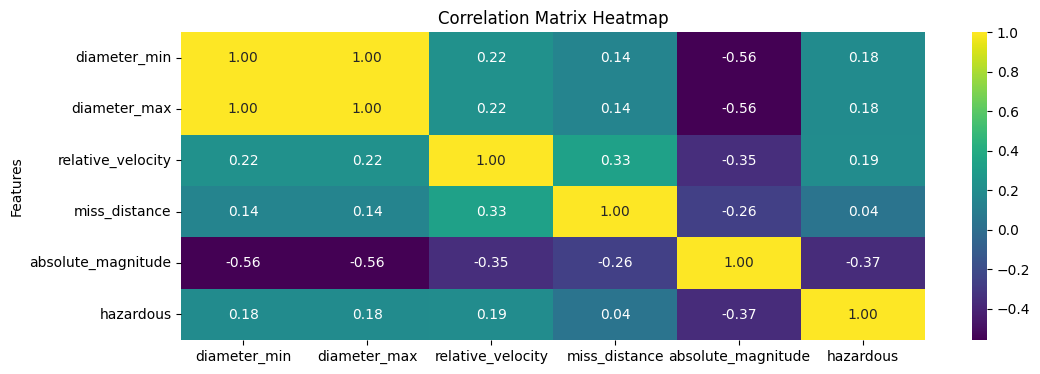

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
features_to_exclude = ['id', 'sentry']
correlation_matrix = correlation_matrix.drop(columns=features_to_exclude, index=features_to_exclude, errors='ignore')
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.ylabel('Features')
plt.title('Correlation Matrix Heatmap')
plt.show()

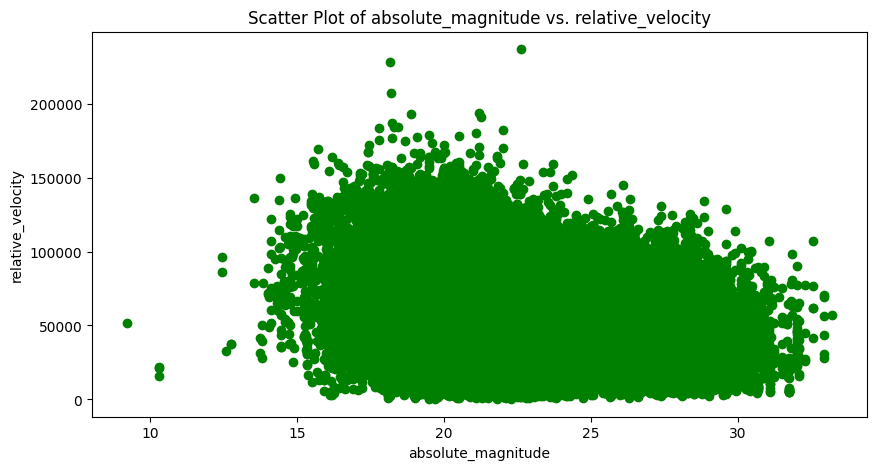

In [48]:
import matplotlib.pyplot as plt
x_feature = df['absolute_magnitude']
y_feature = df['relative_velocity']
plt.figure(figsize=(10, 5))
plt.scatter(x_feature, y_feature, alpha=1, c='green', label='Feature1 vs. Feature2')
plt.xlabel('absolute_magnitude')
plt.ylabel('relative_velocity')
plt.title('Scatter Plot of absolute_magnitude vs. relative_velocity')
plt.show()


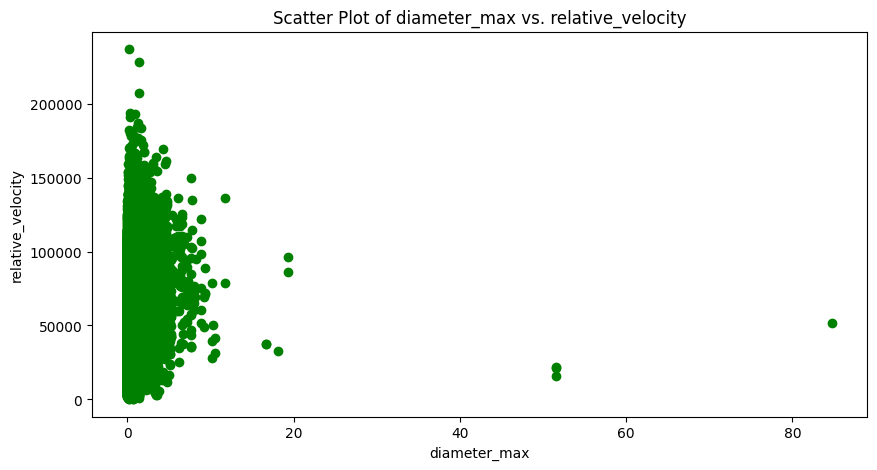

In [49]:
import matplotlib.pyplot as plt
x_feature = df['diameter_max']
y_feature = df['relative_velocity']
plt.figure(figsize=(10, 5))
plt.scatter(x_feature, y_feature, alpha=1, c='green', label='Feature1 vs. Feature2')
plt.xlabel('diameter_max')
plt.ylabel('relative_velocity')
plt.title('Scatter Plot of diameter_max vs. relative_velocity')
plt.show()

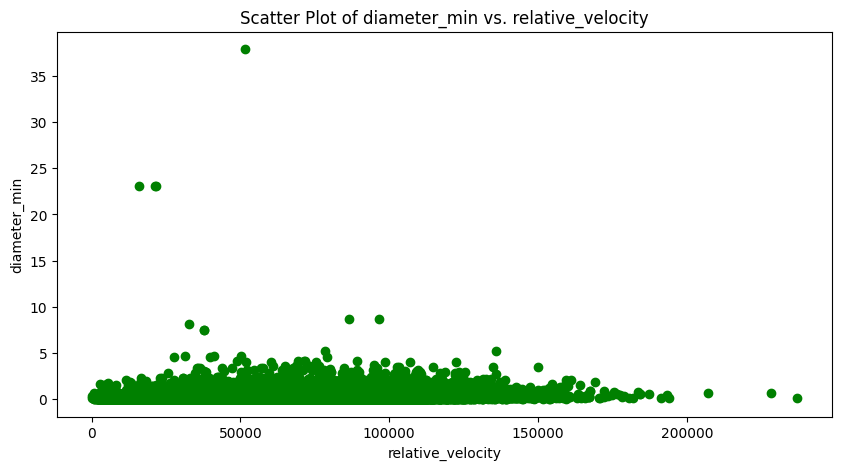

In [50]:
import matplotlib.pyplot as plt
x_feature = df['relative_velocity']
y_feature = df['diameter_min']
plt.figure(figsize=(10, 5))
plt.scatter(x_feature, y_feature, alpha=1, c='green', label='Feature1 vs. Feature2')
plt.xlabel('relative_velocity')
plt.ylabel('diameter_min')
plt.title('Scatter Plot of diameter_min vs. relative_velocity')
plt.show()

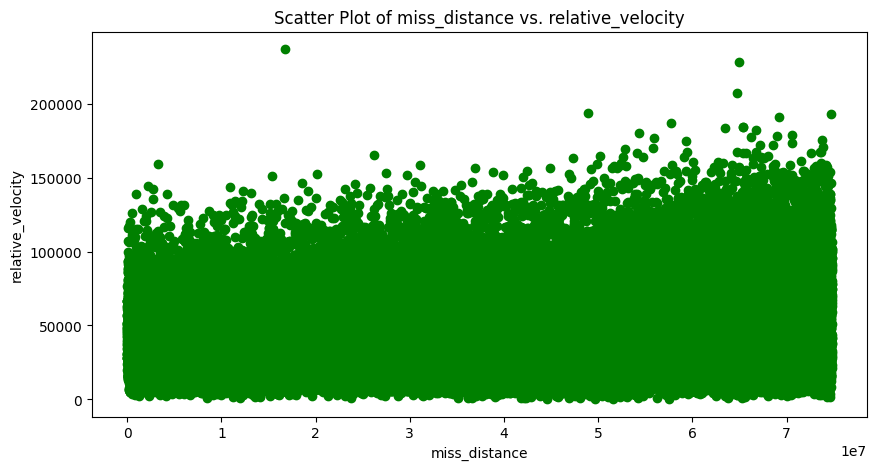

In [51]:
import matplotlib.pyplot as plt
x_feature = df['miss_distance']
y_feature = df['relative_velocity']
plt.figure(figsize=(10, 5))
plt.scatter(x_feature, y_feature, alpha=1, c='green', label='Feature1 vs. Feature2')
plt.xlabel('miss_distance')
plt.ylabel('relative_velocity')
plt.title('Scatter Plot of miss_distance vs. relative_velocity')
plt.show()

In [52]:
categorical_columns

Index(['name', 'orbiting_body', 'sentry', 'hazardous'], dtype='object')

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


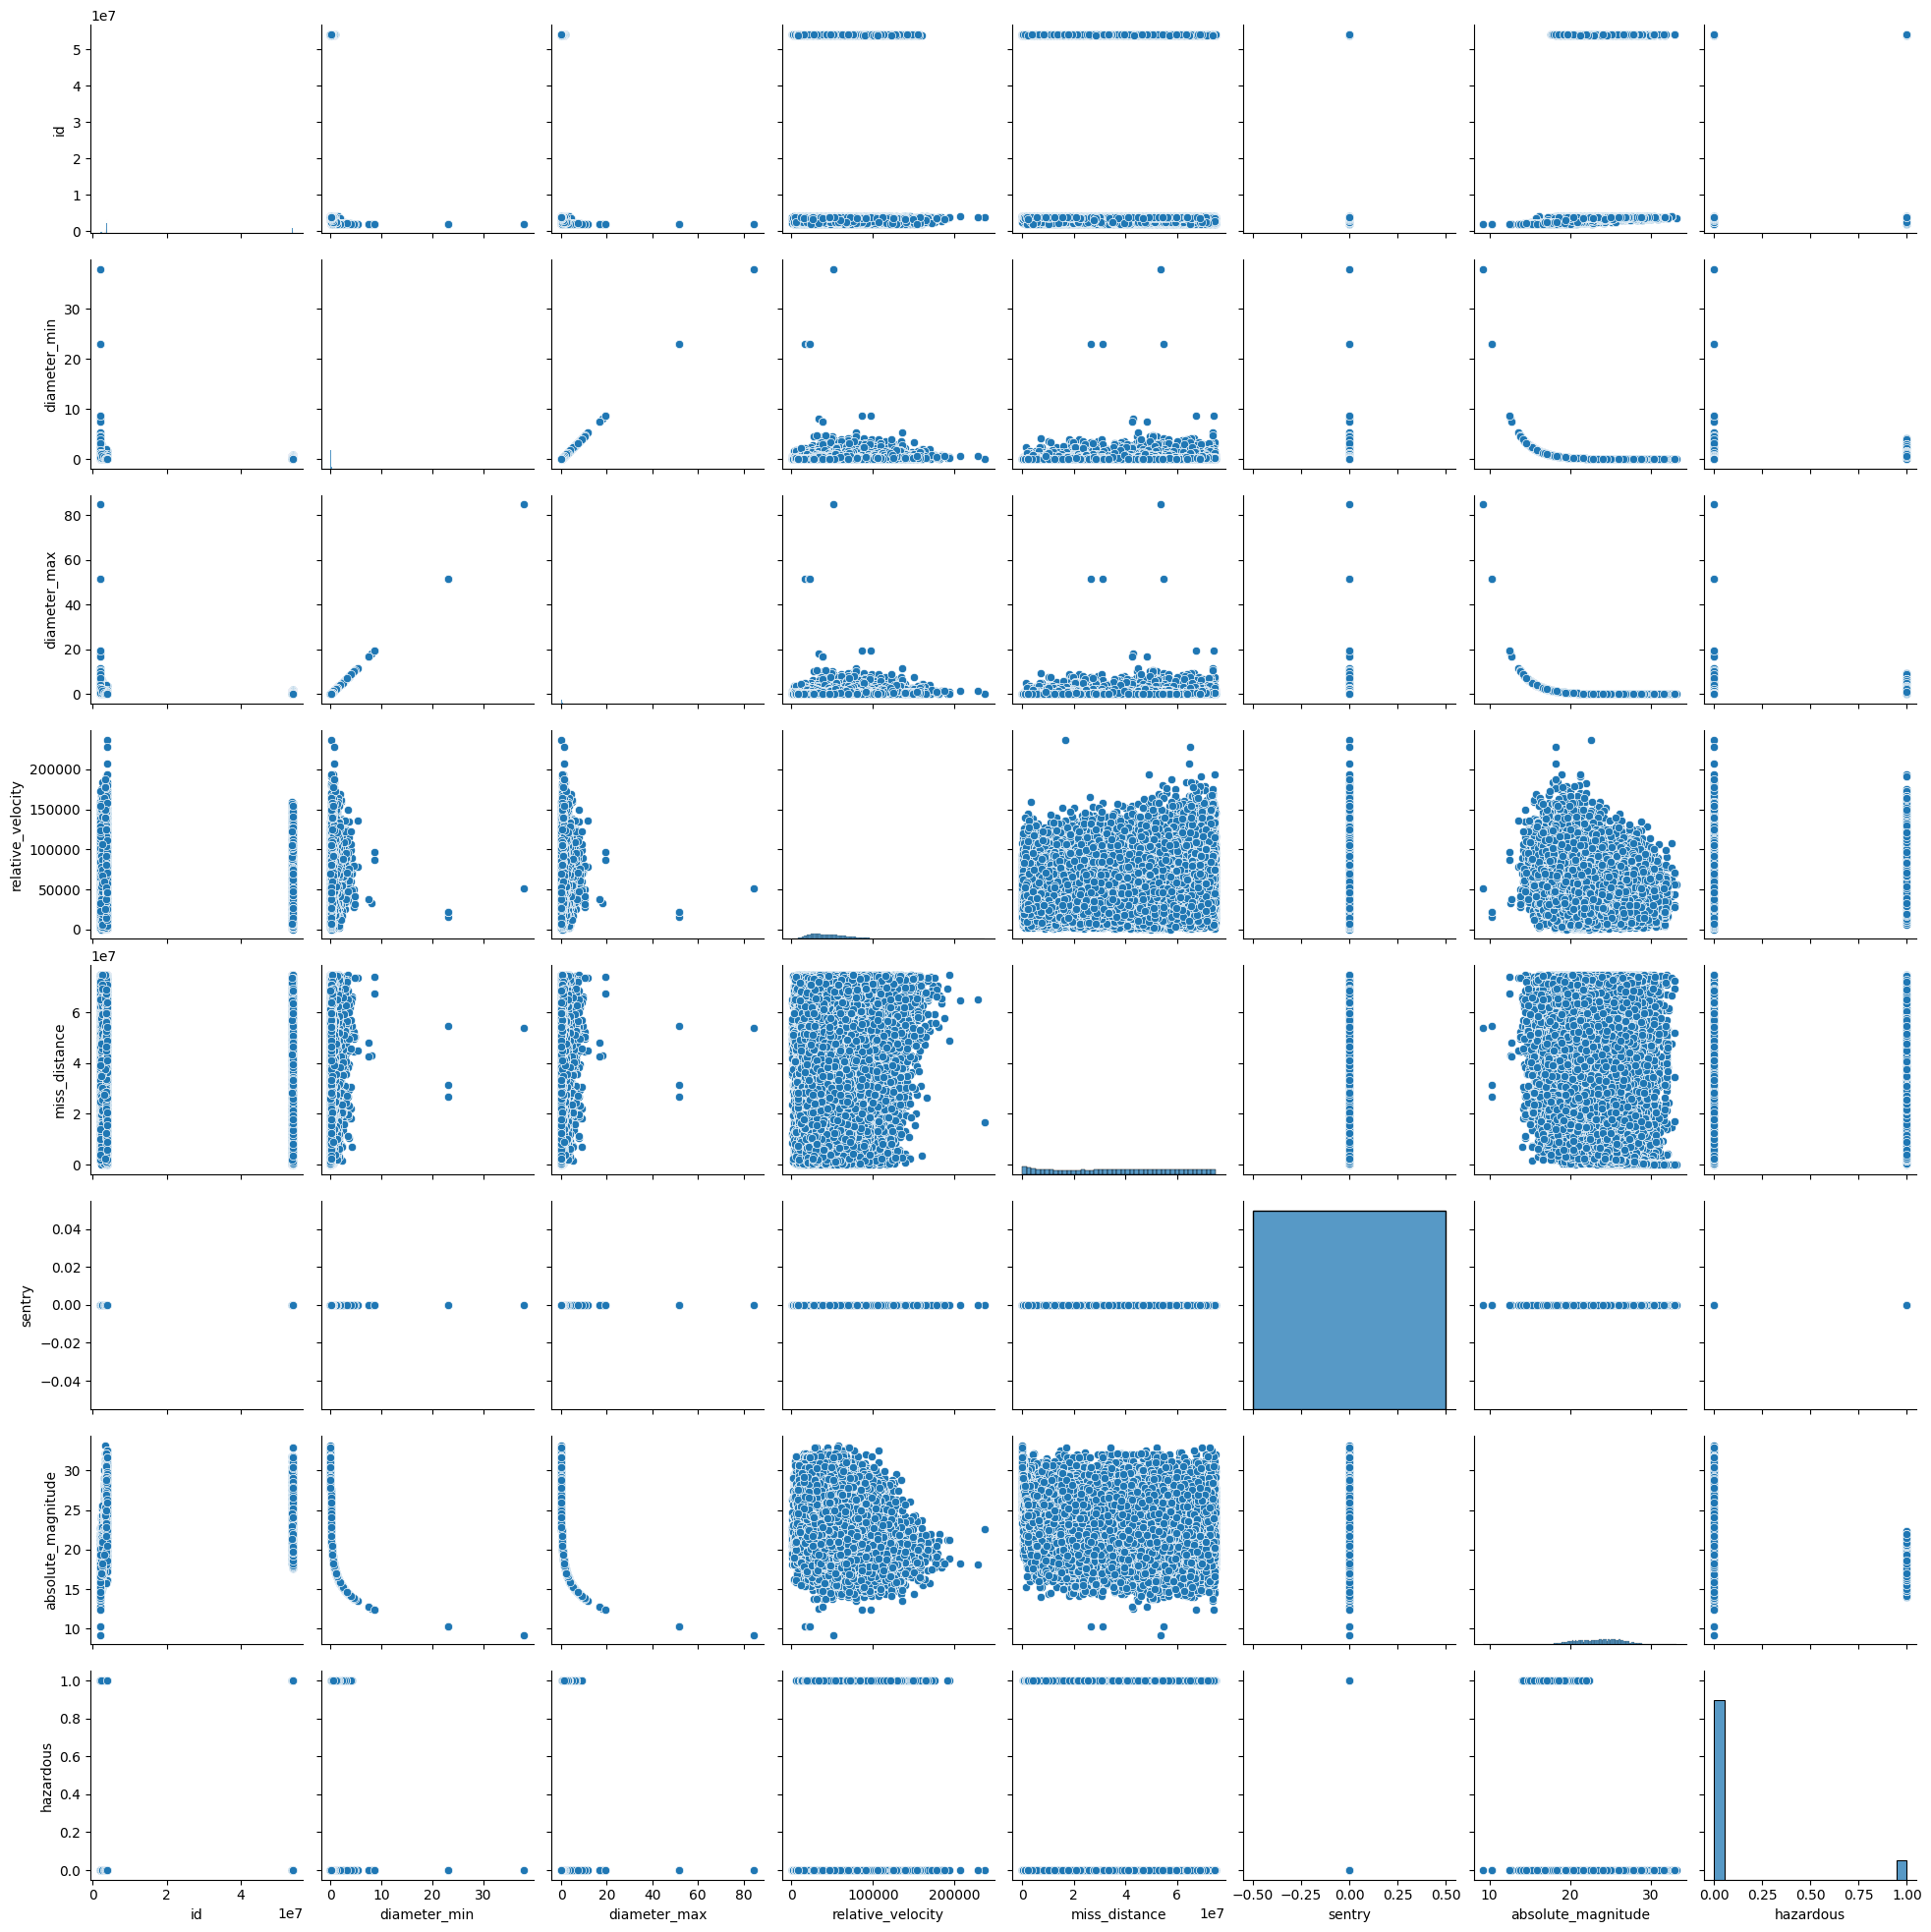

In [53]:
sns.pairplot(df)
plt.show()

In [59]:
hazardous_counts = df['hazardous'].value_counts()

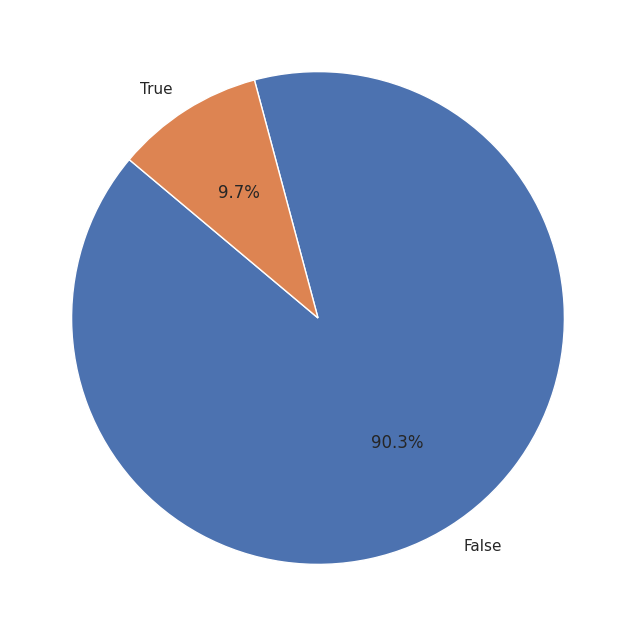

In [68]:
  import matplotlib.pyplot as plt
  hazardous_counts = df['hazardous'].value_counts()
  plt.figure(figsize=(8, 8))
  plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=140)
  plt.show()